In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.core.display import HTML


In [3]:
world_data=gpd.read_file('D:\FirstUniv\DataSet\world-data.geojson\world-data.geojson').query('name!="Antartica"')

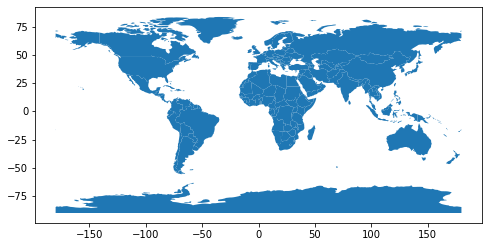

In [4]:
world_data.plot(figsize=(8,8))
plt.show()

In [5]:
world_data.head()

,iso_a3,name,continent,geometry
0,FJI,Fiji,Oceania,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,TZA,Tanzania,Africa,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,ESH,W. Sahara,Africa,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,CAN,Canada,North America,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,USA,United States of America,North America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [6]:
crisis_data=pd.read_csv('D:\FirstUniv\DataSet\global_crisis_data.csv')

In [7]:
# Minor data cleansing
crisis_data = crisis_data.query('Year > 1800').replace({np.nan:0})
crisis_data['Banking Crisis '] = crisis_data['Banking Crisis '].apply(
    lambda d: int(d)
)
crisis_data['Systemic Crisis'] = crisis_data['Systemic Crisis'].apply(
    lambda d: int(d)
)

In [8]:
crisis_data.head()

,Case,CC3,Country,Year,Banking Crisis,Banking_Crisis_Notes,Systemic Crisis,Gold Standard,exch_usd,exch_usd_alt1,...,Domestic_Debt_ Notes/Sources,"SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors","SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors",Defaults_External_Notes,GDP_Weighted_default,<,"Inflation, Annual percentages of average consumer prices",Independence,Currency Crises,Inflation Crises
2,1.0,DZA,Algeria,1801.0,0,0,0,0,0,0.0,...,0,0,0.0,0,0,0,0,0,0,0
3,1.0,DZA,Algeria,1802.0,0,0,0,0,0,0.0,...,0,0,0.0,0,0,0,0,0,0,0
4,1.0,DZA,Algeria,1803.0,0,0,0,0,0,0.0,...,0,0,0.0,0,0,0,0,0,0,0
5,1.0,DZA,Algeria,1804.0,0,0,0,0,0,0.0,...,0,0,0.0,0,0,0,0,0,0,0
6,1.0,DZA,Algeria,1805.0,0,0,0,0,0,0.0,...,0,0,0.0,0,0,0,0,0,0,0


In [9]:
crisis_data.describe()

,Case,Year,Banking Crisis,Systemic Crisis,exch_usd_alt1,"SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors"
count,15120.000000,15120.000000,15120.000000,15120.00000,1.512000e+04,15120.000000
mean,35.500000,1908.500000,0.053373,0.03750,2.847374e+04,0.126124
std,20.205866,62.355223,0.224784,0.18999,3.456540e+06,0.332000
min,1.000000,1801.000000,0.000000,0.00000,0.000000e+00,0.000000
25%,18.000000,1854.750000,0.000000,0.00000,0.000000e+00,0.000000
50%,35.500000,1908.500000,0.000000,0.00000,0.000000e+00,0.000000
75%,53.000000,1962.250000,0.000000,0.00000,0.000000e+00,0.000000
max,70.000000,2016.000000,1.000000,1.00000,4.250000e+08,1.000000


In [10]:
crisis_summary = crisis_data.groupby(['CC3']).agg({'Banking Crisis ':'sum', 'Systemic Crisis':'sum'})

In [11]:
crisis_summary.head()

,Banking Crisis,Systemic Crisis
CC3,,
AGO,7,0
ARG,15,17
AUS,11,4
AUT,8,7
BEL,19,18


In [12]:
crisis_world_summary=world_data.merge(crisis_summary, left_on='iso_a3',right_on='CC3',how='left')
crisis_world_summary.replace({np.nan:0},inplace=True)

In [13]:
crisis_world_summary.head()

,iso_a3,name,continent,geometry,Banking Crisis,Systemic Crisis
0,FJI,Fiji,Oceania,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.0,0.0
1,TZA,Tanzania,Africa,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.0,0.0
2,ESH,W. Sahara,Africa,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.0,0.0
3,CAN,Canada,North America,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",11.0,7.0
4,USA,United States of America,North America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",33.0,20.0


In [14]:
top_limit = 20

title = f'<div style="font-weight: bold; font-size: 16pt;">Top {top_limit} Countries with most Banking Crisis events</div>'
subtitle = f'<div style="font-size: 12pt;">1800 to Present</div>'
display(HTML(title))
display(HTML(subtitle))

crisis_world_summary[['name','continent', 'Banking Crisis ']] \
    .sort_values(['Banking Crisis '], ascending=[False]) \
    .head(top_limit)

,name,continent,Banking Crisis
143,United Kingdom,Europe,33.0
4,United States of America,North America,33.0
132,Spain,Europe,30.0
141,Italy,Europe,26.0
43,France,Europe,26.0
155,Japan,Asia,24.0
130,Netherlands,Europe,23.0
142,Denmark,Europe,22.0
110,Sweden,Europe,21.0
98,India,Asia,21.0


In [15]:
top_limit = 20

title = f'<div style="font-weight: bold; font-size: 16pt;">Top {top_limit} Countries with most Systemic Crisis events</div>'
subtitle = f'<div style="font-size: 12pt;">1800 to Present</div>'
display(HTML(title))
display(HTML(subtitle))

crisis_world_summary[['name','continent', 'Systemic Crisis']] \
    .sort_values(['Systemic Crisis'], ascending=[False]) \
    .head(top_limit)

,name,continent,Systemic Crisis
130,Netherlands,Europe,23.0
4,United States of America,North America,20.0
143,United Kingdom,Europe,20.0
66,Central African Rep.,Africa,19.0
129,Belgium,Europe,18.0
9,Argentina,South America,17.0
48,Zimbabwe,Africa,15.0
43,France,Europe,15.0
117,Romania,Europe,15.0
29,Brazil,South America,14.0


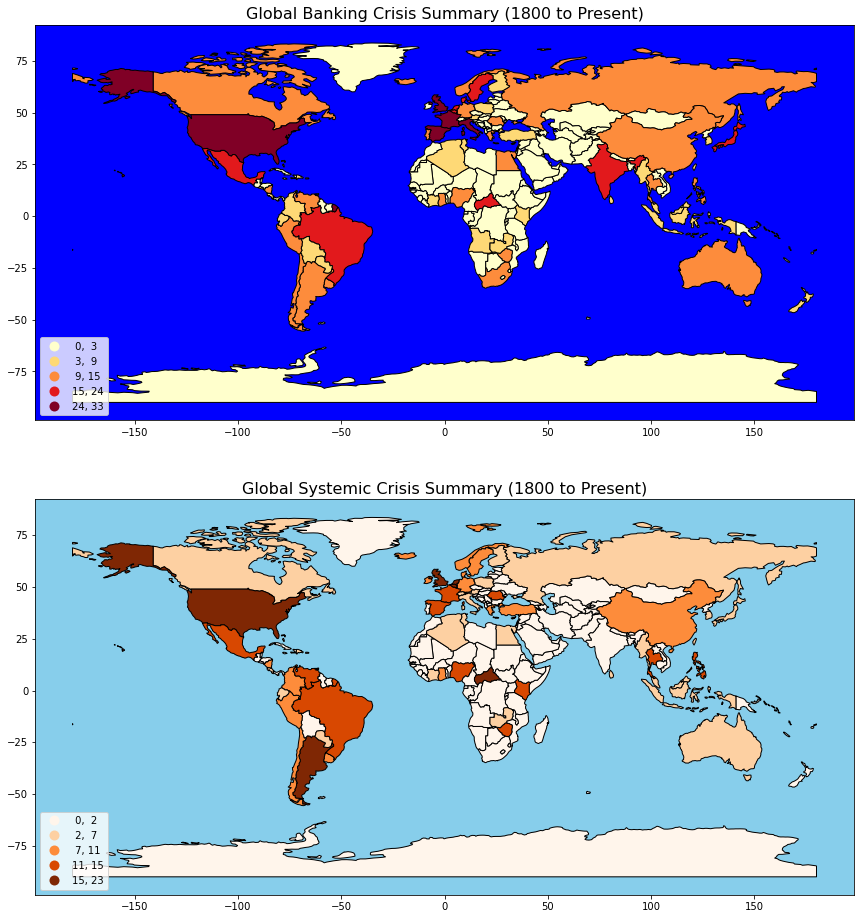

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(20,16))

ax1 = axes[0]
ax1.set_title('Global Banking Crisis Summary (1800 to Present)', fontsize=16)
ax1.set_facecolor('blue')

crisis_world_summary.plot(
    ax=ax1,
    cmap='YlOrRd',
    edgecolor='black',
    column='Banking Crisis ',
    legend=True,
    k=5,
    scheme='fisher_jenks',
    legend_kwds=dict(loc='lower left', fmt='{:,.0f}')
)

ax2 = axes[1]
ax2.set_title('Global Systemic Crisis Summary (1800 to Present)', fontsize=16)
ax2.set_facecolor('skyblue')

crisis_world_summary.plot(
    ax=ax2,
    cmap='Oranges',
    edgecolor='black',
    column='Systemic Crisis',
    legend=True,
    k=5,
    scheme='fisher_jenks',
    legend_kwds=dict(loc='lower left', fmt='{:,.0f}')
)
plt.show()

In [59]:
crisis_summary = crisis_data \
    .groupby(['Year']) \
    .agg({'Banking Crisis ':'sum', 'Systemic Crisis':'sum'}) \
    .sort_values(['Year'], ascending=[True])
crisis_summary.head()

,Banking Crisis,Systemic Crisis
Year,,
1801.0,0,0
1802.0,1,1
1803.0,0,0
1804.0,0,0
1805.0,1,1


In [60]:
crisis_cumulative_summary = crisis_summary[['Banking Crisis ', 'Systemic Crisis']] \
    .agg({'Banking Crisis ':'cumsum', 'Systemic Crisis':'cumsum'})
crisis_cumulative_summary.head()

,Banking Crisis,Systemic Crisis
Year,,
1801.0,0,0
1802.0,1,1
1803.0,1,1
1804.0,1,1
1805.0,2,2


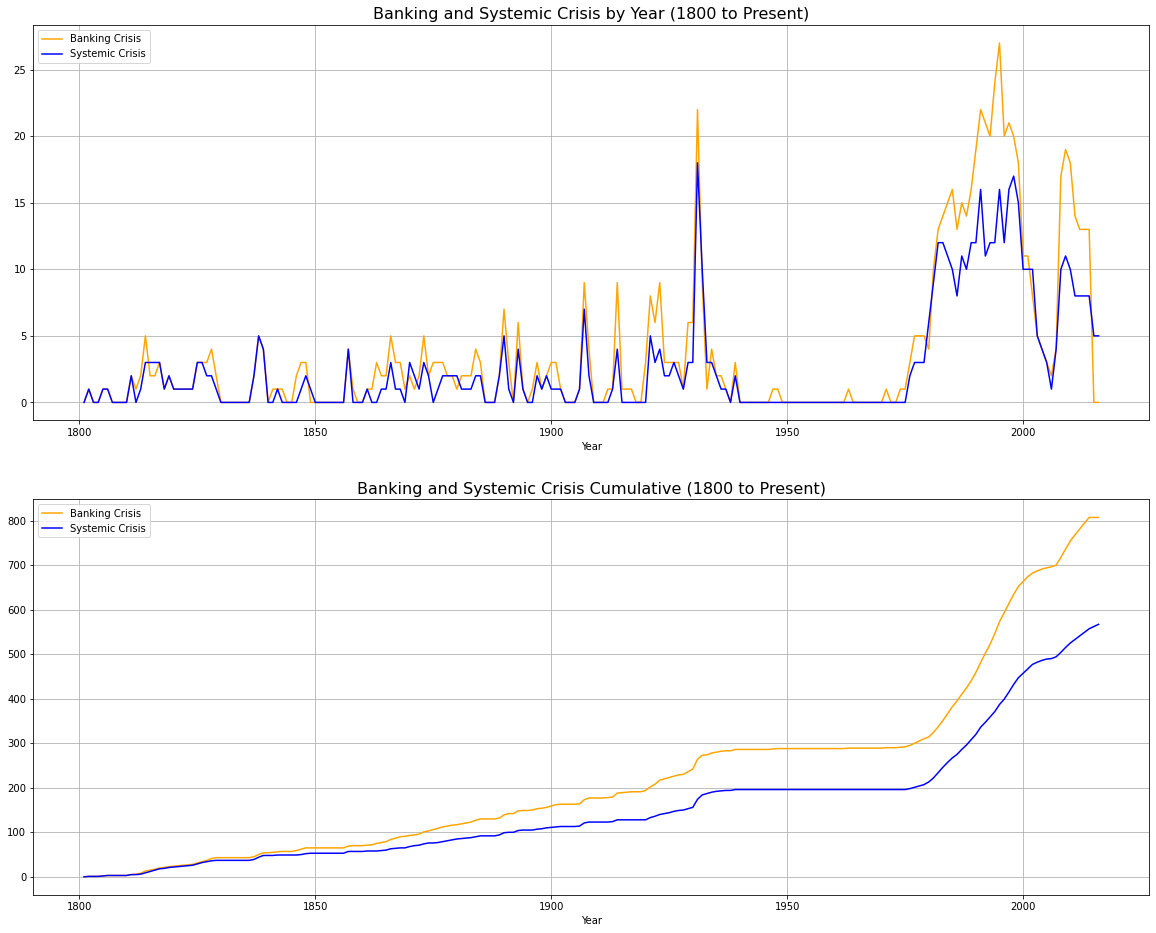

In [63]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,16))

ax1.set_title('Banking and Systemic Crisis by Year (1800 to Present)', fontsize=16)

crisis_summary.plot(
    kind='line',
    color=['orange', 'blue'],
    ax=ax1,
    grid=True
)
ax1.legend(loc='upper left')

ax2.set_title('Banking and Systemic Crisis Cumulative (1800 to Present)', fontsize=16)

crisis_cumulative_summary.plot(
    kind='line',
    color=['orange', 'blue'],
    ax=ax2,
    grid=True
)
ax2.legend(loc='upper left')

plt.show()